In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.model_selection import GridSearchCV

In [2]:
class linear_svm():
    
    def __init__(self, lr=0.01, itr=1000):
        self.lr = lr
        self.itr = itr
        self.w = None
        self.b = None
        self.y=None
        
    def fit(self, X,y):
        samples, feat = X.shape
        self.y=y
        self.w = np.zeros(feat)
        self.b = 0
        
        labels = np.ones(samples)
        
        j = 0
        for s in y:
            if s <= 0:
                labels[j] = -1
            j += 1
            
        for i in range(self.itr):
            c = 0
            for x_i in X: 
                # check if y * (wx - b) >=1 and udpate weights accordingly
                if (labels[c] * (np.dot(x_i, self.w) - self.b)) >= 1:
                    self.w = self.w - self.lr * self.w
                else:
                    self.w = self.w - self.lr * (self.w - np.dot(x_i, labels[c]))
                    self.b = self.b - self.lr * labels[c]
                c += 1
                
        
    def predict(self, X):
        pred = np.dot(X, self.w) - self.b   
        return pred
    
    def get_acc(self, X, y_actual):
       
        pred = np.sign(self.predict(X)) 
        count = 0
        for i in range(len(pred)):
            if pred[i] == y_test[i]:
                count += 1
        
        return count/len(pred)

    def plot_db(self, X, y):
        plt.scatter(X[:,0], X[:,1], c=y)
        ax = plt.gca()
        x_b = ax.get_xlim()
        y_b = ax.get_ylim()
        xx = np.linspace(x_b[0], x_b[1], 50)
        yy = np.linspace(y_b[0], y_b[1], 50)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = self.predict(xy).reshape(XX.shape)
        ax.contour(XX, YY, Z, levels=[-1, 0, 1],linestyles=['--', '-', '--'])
        
        plt.show()
        return

In [3]:
class log_reg():
    def __init__(self, lr=0.01, itr=1000):
        self.lr = lr
        self.itr = itr
        self.w = None
        self.b = None
        
        
    def sig(self, x):
        return 1.0/(1+np.exp(-x))

    def calc_gradient(self, X, y, y_hat, m):
        grad = (1/m)*np.dot(X.T,(y_hat - y))   
        return grad
    
    def fit(self, X, y):
        m,n = X.shape
        self.w = np.zeros(n)
    
        for i in range(self.itr):
            y_hat = self.sig(np.dot(X, self.w))
            grad = self.calc_gradient(X, y, y_hat, m)
            self.w = self.w - self.lr * grad
            
        return 
        
      
    def predict(self, X):
        return self.sig(np.dot(X, self.w))
        
        labels = []
              
        for pred in predictions:
            if pred >= 0.5:
                labels.append(1)
            else:
                labels.append(-1)
            
        labels = np.asarray(labels)
        return labels
        
    
    def get_acc(self, X, y):
        predictions = self.predict(X)
        
        labels = []
       
        for pred in predictions:
            if pred >= 0.5:
                labels.append(1)
            else:
                labels.append(-1)
            
        labels = np.asarray(labels)
        
        count = 0
        for i in range(len(labels)):
            if labels[i] == y[i]:
                count += 1
        
        return count/len(labels)
        
    def plot_db(self, X, y):
        
        plt.scatter(X[:,0], X[:,1], c=y)
        x_values = [np.min(X[:, 0]), np.max(X[:, 1])]
        y_values = - (np.dot(self.w[0], x_values)) / self.w[1]

        plt.plot(x_values, y_values, label='Decision Boundary')
        
        plt.show()
        return

### 1: Linear SVM and Logistic Regression

In [5]:
# Test linear svm
iD = np.array([[1, 0],[0,1]])
# set labels
y1 = np.ones(750)
y2 = np.ones(750) * -1
p = np.random.multivariate_normal([2.5,0], iD, 750)
n = np.random.multivariate_normal([-2.5,0], iD, 750)
X = np.concatenate((p,n), 0)
y = np.concatenate((y1, y2), 0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=250, random_state=42)


[ 1.  1. -1. -1. -1.  1.  1.  1. -1. -1.]


In [6]:
lsvm = linear_svm()
lsvm.fit(X_train, y_train)
print("Linear SVM Acc:", lsvm.get_acc(X_test, y_test))

Linear SVM Acc: 0.992


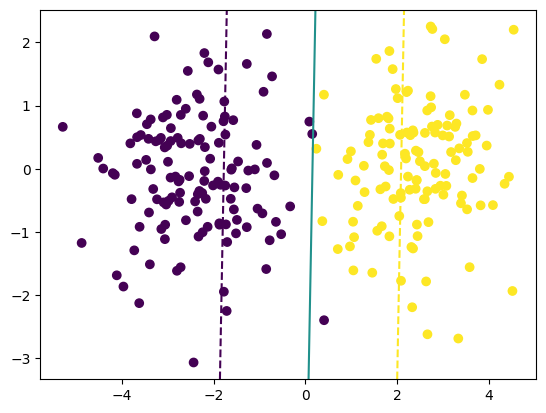

In [ ]:
lsvm.plot_db(X_test, y_test)

Log Reg acc: 0.996


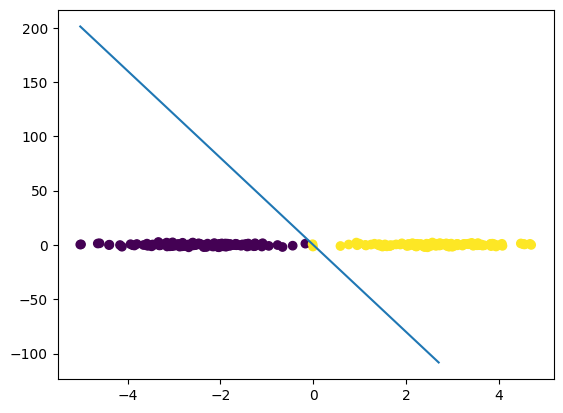

In [10]:
lr = log_reg()
lr.fit(X_train, y_train)
print("Log Reg acc:", lr.get_acc(X_test, y_test))
lr.plot_db(X_test, y_test)

### 2. KNN and Naive Bayes

In [ ]:
# Finding the best set of hyperparameters for knn using sklearn gridsearch CV
#Consider three hyperparameters# 1. 
#n_neighbors: Decide the best k 
#weights: adding the weights to data points. 'uniform' ->no weight, 
#'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.
#metric: The distance metric for similarity.
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(neighbors.KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train, y_train)
print ("Best Score: ",g_res.best_score_)
print ("Best Hyperparameters: ", g_res.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Score:  0.9959989930049811
Best Hyperparameters:  {'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'uniform'}


KNN Accuracy: 0.992


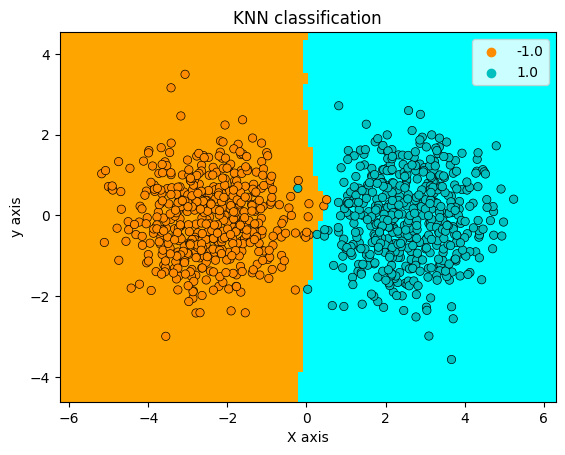

In [11]:


# Create color maps
cmap_light = ListedColormap(["orange", "cyan"])
cmap_bold = ["darkorange", "c"]


knn = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance', metric='minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    knn,
    X_train,
    cmap=cmap_light,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel="X axis",
    ylabel="y axis",
    shading="auto",
)
# Plot also the training points
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
    #hue=iris.target_names[y],
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)
plt.title("KNN classification" )

plt.show()



In [ ]:
# Finding the best set of hyperparameters for naive bayes using sklearn gridsearch CV
#var_smoothing is a stability calculation to widen (or smooth) the curve and therefore account for 
#more samples that are further away from the distribution mean. 
#np.logspace returns numbers spaced evenly on a log scale, starts from 0, ends at -9
grid_params = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

gs = GridSearchCV(estimator=GaussianNB(), param_grid=grid_params, verbose = 1, cv=10, n_jobs = -1)
g_res = gs.fit(X_train, y_train)
print ("Best Score: ",g_res.best_score_)
print ("Best Hyperparameters: ", g_res.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Score:  0.994
Best Hyperparameters:  {'var_smoothing': 1.0}


Naive Bayes Accuracy: 0.992


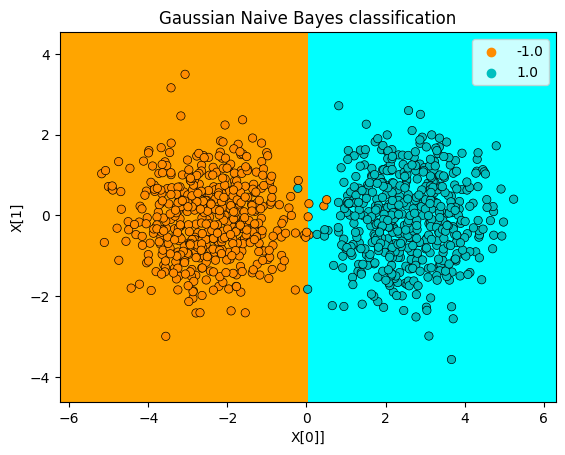

In [12]:


# Build a Gaussian Classifier
gnb = GaussianNB(var_smoothing=1.0)

# Model training
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    gnb,
    X_train,
    cmap=cmap_light,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel="X[0]]",
    ylabel="X[1]",
    shading="auto",
)
# Plot also the training points
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
    #hue=iris.target_names[y],
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)
plt.title(
    "Gaussian Naive Bayes classification")

plt.show()


### 3. 
----
Repeat the process by varying μ from 1.0 to 2.4 with step size of 0.2, for 
each value of μ obtain test
accuracies of the models and plot ( μ on x-axis and test accuracy on y-axis). ( You will have a curve for
each of the 4-classifiers mentioned above)

In [ ]:
lsvm_acc = []
lr_acc = []
knn_acc = []
nb_acc = []
mean_val = []

iD = np.array([[1, 0],[0,1]])
# set labels
y1 = np.ones(750)
y2 = np.ones(750) * -1
for m in np.arange(1.0,2.6, .2):
  print("mean value:", m)
  mean_val.append(m)
  p = np.random.multivariate_normal([m,0], iD, 750)
  n = np.random.multivariate_normal([m*-1,0], iD, 750)
  X = np.concatenate((p,n), 0)
  y = np.concatenate((y1, y2), 0)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500, random_state=42)
  #X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=250, random_state=42)

  #fit lsvm model and get the accuracy on test data 
  lsvm = linear_svm()
  lsvm.fit(X_train, y_train)
  lsvm_acc.append(lsvm.get_acc(X_test, y_test))

  #fit logistic regression model and get the accuracy on test data 
  lr = log_reg()
  lr.fit(X_train, y_train)
  lr_acc.append(lr.get_acc(X_test, y_test))
 
  #fit knn model and get the accuracy on test data 
  knn = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance', metric='minkowski')
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  knn_acc.append(accuracy_score(y_test, y_pred))

  #fit gaussian naive bayes model and get the accuracy on test data 
  gnb = GaussianNB(var_smoothing=1.0)
  gnb.fit(X_train, y_train)
  y_pred = gnb.predict(X_test)
  nb_acc.append(accuracy_score(y_test, y_pred))



mean value: 1.0
mean value: 1.2
mean value: 1.4
mean value: 1.5999999999999999
mean value: 1.7999999999999998
mean value: 1.9999999999999998
mean value: 2.1999999999999997
mean value: 2.3999999999999995


<ipython-input-13-df04147ee34b>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, 1)


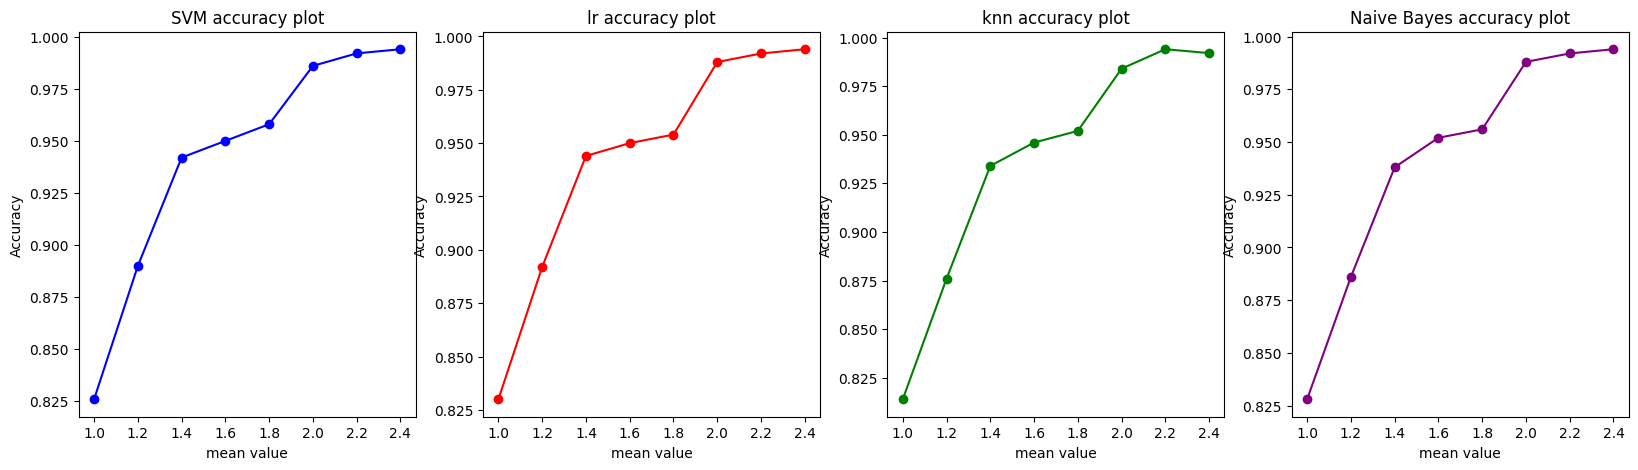

In [ ]:

plt.subplots(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.plot(mean_val, lsvm_acc, marker='o', color = 'blue')
plt.title('SVM accuracy plot')
plt.ylabel('Accuracy')
plt.xlabel('mean value')
plt.subplot(1, 4, 2)
plt.plot(mean_val, lr_acc, marker='o',color = 'red')
plt.title('lr accuracy plot')
plt.ylabel('Accuracy')
plt.xlabel('mean value')
plt.subplot(1, 4, 3)
plt.plot(mean_val, knn_acc, marker='o', color = 'green')
plt.title('knn accuracy plot')
plt.ylabel('Accuracy')
plt.xlabel('mean value')
plt.subplot(1, 4, 4)
plt.plot(mean_val, nb_acc, marker='o',color = 'purple')
plt.title('Naive Bayes accuracy plot')
plt.ylabel('Accuracy')
plt.xlabel('mean value')
plt.show()